In [123]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Linear Regression

In this lab, we are going to continue to explore linear regression and introduce the concept of regularisation, specifically, Ridge Regression, Lasso and Elastic Net.

This lab starts with Part III of the previous one!



## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



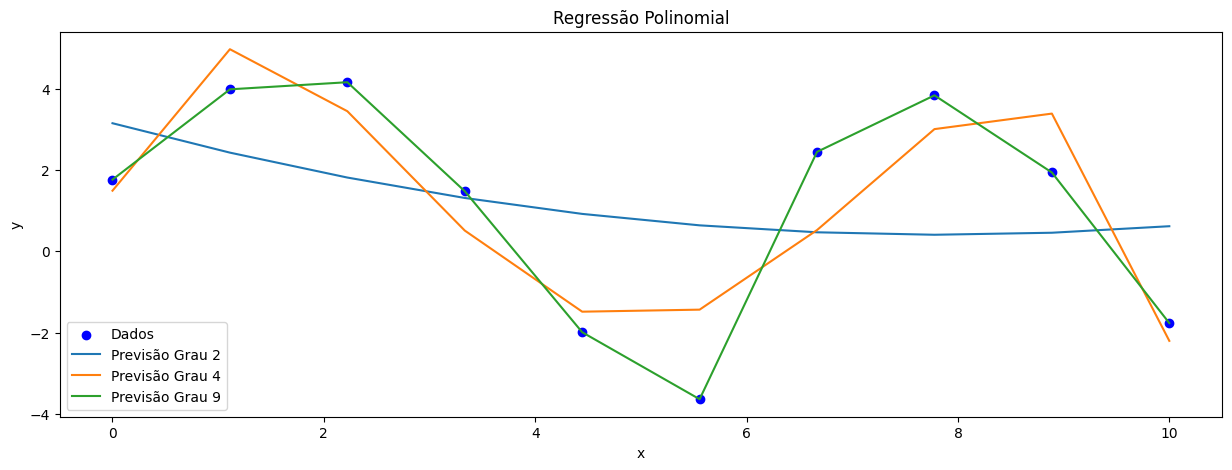

In [124]:
# Vamos definir o estado inicial do gerador de números aleatórios
np.random.seed(0)

# Criaremos um vetor de 50 elementos no intervalo [0, 10] para ser o x
x = np.linspace(0, 10, 10)

# Criando y a partir de x
y = 4 * np.sin(x) + np.random.normal(0, 1, size=x.shape[0])

# Definindo a função de base polinomial manualmente
def base_polinomial_manual(x, grau):
    Phi = np.zeros((len(x), grau + 1))
    for i in range(grau + 1):
        Phi[:, i] = x ** i
    return Phi

# Transformando x em matrizes de design para graus 2, 4 e 9
graus = [2, 4, 9]
matrizes_design = [base_polinomial_manual(x, grau) for grau in graus]

# Ajustando modelos de regressão para cada grau
modelos = []
for grau, Phi in zip(graus, matrizes_design):
    modelo = LinearRegression().fit(Phi, y)
    modelos.append(modelo)

#GRÁFICO 
    
# Criando uma figura com tamanho definido
plt.figure(figsize=(15, 5))

# Criando um gráfico de dispersão dos dados escolhidos anteriormente
plt.scatter(x, y, color='blue', label='Dados')  

# Para cada grau e modelo no conjunto de graus e modelos
for grau, modelo in zip(graus, modelos):
    # Calcularemos as características polinomiais usando a função base_polinomial_manual
    Phi = base_polinomial_manual(x, grau)
    
    # Fazeremos previsões usando o modelo
    y_pred = modelo.predict(Phi)
    
    # Plotaremos as previsões como uma linha, rotulada com o grau do polinômio
    plt.plot(x, y_pred, label=f'Previsão Grau {grau}')

# Colocando título no gráfico
plt.title('Regressão Polinomial')

# Colocando legenda no eixo x
plt.xlabel('x')

# Colocando legenda no eixo x y
plt.ylabel('y')

# Colocando legenda no gráfico 
plt.legend()

# Exibir o gráfico
plt.show()

## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

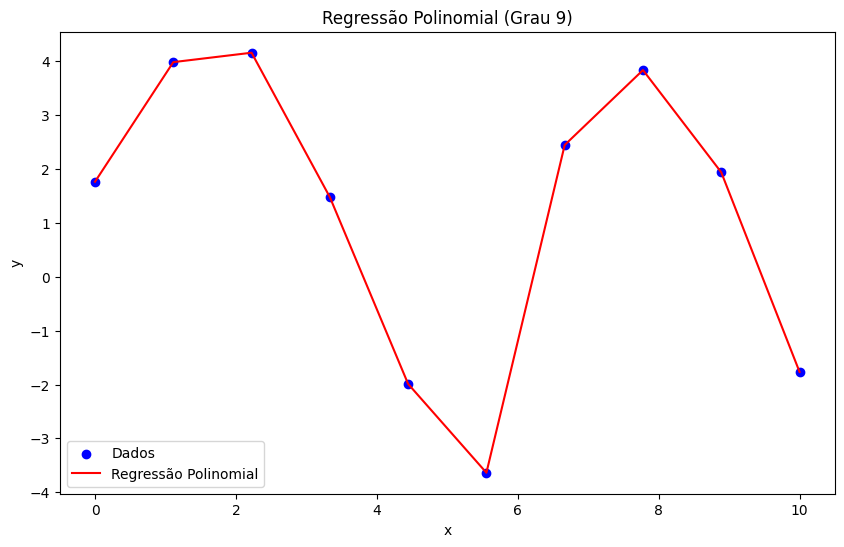

In [125]:
# Vamos definir o estado inicial do gerador de números aleatórios
np.random.seed(0)

# Criaremos um vetor de 50 elementos no intervalo [0, 10] para ser o x
x = np.linspace(0, 10, 10)

# Criando y a partir de x
y = 4 * np.sin(x) + np.random.normal(0, 1, size=x.shape[0])

# Redimensionando x para um vetor de coluna
x = x.reshape(-1, 1)

# Definindo o grau do polinômio
grau = 9

# Criando features polinomiais
poly = PolynomialFeatures(degree=grau)
X_poly = poly.fit_transform(x)

# Ajustando o modelo de regressão linear
modelo = LinearRegression().fit(X_poly, y)

# Previsões
y_pred = modelo.predict(X_poly)

# GRÁFICO

# Criando uma figura com tamanho definido
plt.figure(figsize=(10, 6))

# Criando um gráfico de dispersão dos dados escolhidos anteriormente
plt.scatter(x, y, color='blue', label='Dados')

# Adicionando a linha da regressão polinomial 
plt.plot(x, y_pred, color='red', label='Regressão Polinomial')

# Colocando título no gráfico 
plt.title(f'Regressão Polinomial (Grau {grau})')

# Colocando legenda no eixo x
plt.xlabel('x')

# Colocando legenda no eixo y
plt.ylabel('y')

# Colocando legenda no gráfico 
plt.legend()

# Exibindo o gráfico
plt.show()

### Load the housing dataset

Using pandas, load the following dataset (available in eclass, taken from http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html):

**housing.csv:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

This dataset was also pre-processed and scaled.

In [126]:
housing_df = pd.read_csv('housing.csv')
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165,3.135494


In [127]:
X = housing_df.values[:,:-1]
y = housing_df['MEDV']

### Let's split the data into training, validation and testing. 80% training, 10% validation and 10% testing.

In [128]:
# Dividir os dados em conjuntos de treinamento, validação e teste (80%, 10%, 10%)
# A função train_test_split é utilizada duas vezes para separar os dados em três conjuntos distintos
# O parâmetro test_size especifica a proporção dos dados que serão usados para validação/teste
# O parâmetro random_state garante que a divisão dos dados seja reproduzível
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Exibir as Tamanhos dos conjuntos de dados resultantes
print("Tamanho do conjunto de treinamento:", X_train.shape, y_train.shape)
print("Tamanho do conjunto de validação:", X_val.shape, y_val.shape)
print("Tamanho do conjunto de teste:", X_test.shape, y_test.shape)


Tamanho do conjunto de treinamento: (404, 13) (404,)
Tamanho do conjunto de validação: (51, 13) (51,)
Tamanho do conjunto de teste: (51, 13) (51,)


# Part I - Ridge Regression

Now you will write code that implements Ridge Regression using the closed form from the slides.

In [129]:
def ridge_regression(X, y, alpha):
    n_samples, n_features = X.shape
    
    # Calcular a matriz identidade
    identity_matrix = np.identity(n_features)
    
    # Calcular os coeficientes usando a fórmula fechada: w = (X^T*X + alpha*I)^-1 * X^T * y
    coeficientes = np.linalg.inv(X.T.dot(X) + alpha * identity_matrix).dot(X.T).dot(y)
    
    return coeficientes

Test different values of $\lambda$ on the validation set and choose the one that gives the best RMSE.

In [130]:
# Criar uma lista de valores lambda entre 1 e 1000
valores_lambda = np.arange(0.01, 1001)

melhor_lambda = None
melhor_rmse = float('inf')

# Para cada valor de lambda na lista
for alpha in valores_lambda:
    # Calcular os coeficientes da Regressão Ridge
    coeficientes_ridge = ridge_regression(X_train, y_train, alpha)
    
    # Fazer previsões nos dados de validação
    y_val_predito = X_val.dot(coeficientes_ridge)
    
    # Calcular o RMSE das previsões
    rmse = np.sqrt(mean_squared_error(y_val, y_val_predito))
    
    # Atualizar o melhor valor de lambda se o RMSE for menor
    if rmse < melhor_rmse:
        melhor_lambda = alpha
        melhor_rmse = rmse

print("Melhor valor de lambda:", melhor_lambda)
print("Melhor RMSE no conjunto de validação:", melhor_rmse)



Melhor valor de lambda: 1.01
Melhor RMSE no conjunto de validação: 0.3816715892001723


Plot the RMSE of the validation and training sets at different values of $\lambda$. 

Try: 20 points in the interval $\lambda \in [0,2]$

Your plot should like the one below.

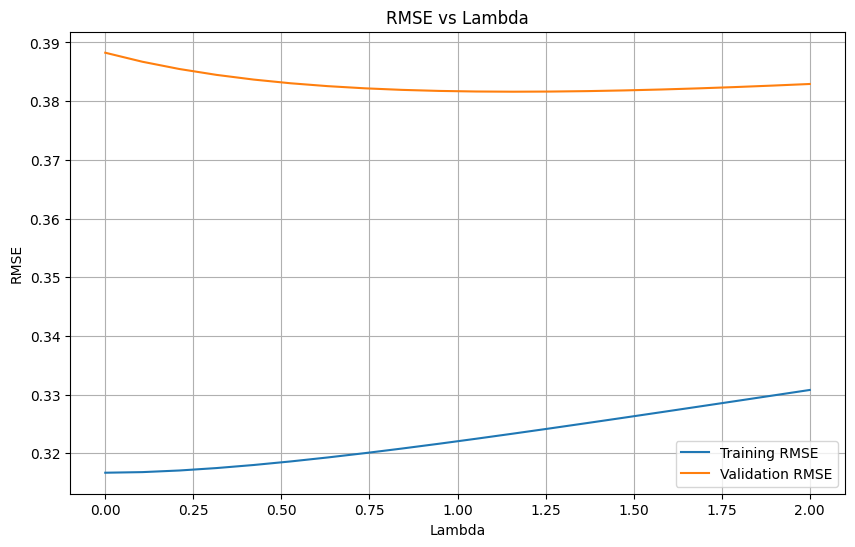

In [131]:
# Define a range of lambda values
lambda_values = np.linspace(0, 2, 20)

# Initialize lists to store RMSE values
train_rmse_values = []
val_rmse_values = []

# For each value of lambda
for alpha in lambda_values:
    # Calculate coefficients for Ridge Regression
    coeficientes_ridge = ridge_regression(X_train, y_train, alpha)
    
    # Predictions on training set
    y_train_pred = X_train.dot(coeficientes_ridge)
    # Calculate RMSE on training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_rmse_values.append(train_rmse)
    
    # Predictions on validation set
    y_val_pred = X_val.dot(coeficientes_ridge)
    # Calculate RMSE on validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_rmse_values.append(val_rmse)

# Plot RMSE values for training and validation sets
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_rmse_values, label='Training RMSE')
plt.plot(lambda_values, val_rmse_values, label='Validation RMSE')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('RMSE vs Lambda')
plt.legend()
plt.grid(True)
plt.show()


Now, after selecting the best $\lambda$ based on the plot above, report the RMSE of the testing set.

Don't forget to use the whole training set (train+validation) to train a model with the best value of $\lambda$.

In [132]:
# Escolher o melhor lambda com base no gráfico
melhor_lambda = valores_lambda[np.argmin(val_rmse_values)]

# Concatenar os conjuntos de treinamento e validação
X_treino_completo = np.concatenate((X_train, X_val), axis=0)
y_treino_completo = np.concatenate((y_train, y_val), axis=0)

# Treinar o modelo de Regressão Ridge com o melhor lambda
coeficientes_ridge_melhor = ridge_regression(X_treino_completo, y_treino_completo, melhor_lambda)

# Previsões no conjunto de teste
y_teste_predito = X_test.dot(coeficientes_ridge_melhor)

# Calcular RMSE no conjunto de teste
rmse_teste = np.sqrt(mean_squared_error(y_test, y_teste_predito))

print("Melhor Lambda:", melhor_lambda)
print("RMSE no Conjunto de Teste com o Melhor Lambda:", rmse_teste)

Melhor Lambda: 11.01
RMSE no Conjunto de Teste com o Melhor Lambda: 0.4070292731373414


# Part II - Lasso

Now you will implement Lasso regression, but using the scikit-learn implementation to learn the weights.

You will still use the same training/validation/testing folds as in Part I

In [133]:
# The general way of using the Lasso implementation (or any other classifier/regressor) of scikit-learn is as follows:
# Make sure to replace X, y, and X_val with your training set variables!
#alpha_value = np.arange(1, 1001)
#lasso_regression = Lasso(alpha=alpha_value).fit(X, y)
#y_predict_lasso_reg = lasso_regression.predict(X_val)


### The goal here is to again find a good value of alpha for the RMSE in the validation set. 
Experiment with some different values, generate the same plot as Part I, and report the RMSE of testing set after selecting the best alpha from the validation set.

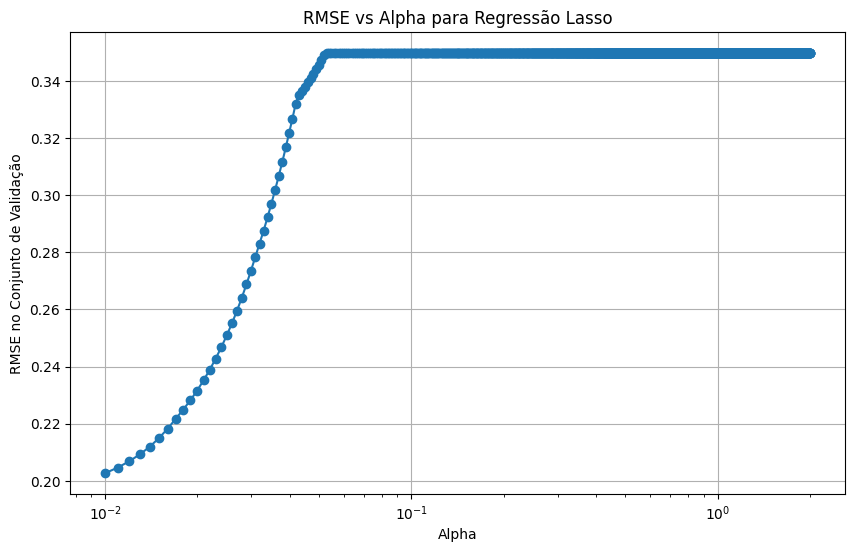

Melhor Alpha: 0.01
RMSE no Conjunto de Teste com o Melhor Alpha: 0.21135555031411332


In [134]:
from sklearn.linear_model import Lasso

# Definir uma lista de valores alpha para testar
valores_alpha = np.linspace(0.01, 2, 2000)

# Inicializar uma lista para armazenar o RMSE do conjunto de validação para cada valor de alpha
val_rmse_values_lasso = []

# Para cada valor de alpha na lista
for alpha in valores_alpha:
    # Instanciar e treinar o modelo de regressão Lasso
    lasso_regression = Lasso(alpha=alpha).fit(X_train, y_train)
    
    # Fazer previsões no conjunto de validação
    y_val_pred_lasso = lasso_regression.predict(X_val)
    
    # Calcular o RMSE no conjunto de validação
    val_rmse_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
    
    # Adicionar o RMSE à lista de valores
    val_rmse_values_lasso.append(val_rmse_lasso)

# Plotar os valores de RMSE para diferentes valores de alpha
plt.figure(figsize=(10, 6))
plt.plot(valores_alpha, val_rmse_values_lasso, marker='o')
plt.xlabel('Alpha')
plt.ylabel('RMSE no Conjunto de Validação')
plt.title('RMSE vs Alpha para Regressão Lasso')
plt.xscale('log')  # Escala logarítmica para melhor visualização
plt.grid(True)
plt.show()

# Escolher o valor de alpha que resulta no menor RMSE no conjunto de validação
melhor_alpha = valores_alpha[np.argmin(val_rmse_values_lasso)]

# Treinar um modelo de regressão Lasso com o melhor alpha encontrado usando o conjunto de treinamento completo
lasso_regression_final = Lasso(alpha=melhor_alpha).fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_test_pred_lasso = lasso_regression_final.predict(X_test)

# Calcular RMSE no conjunto de teste
rmse_teste_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print("Melhor Alpha:", melhor_alpha)
print("RMSE no Conjunto de Teste com o Melhor Alpha:", rmse_teste_lasso)


# Part III Elastic Net

Now let's combine both ridge and lasso and implement Elastic Net Regression, again we'll use the sklearn implementation.

Following the guidelines from Part II, implement Elastic Net using the sklearn implementation ElasticNet()

I strongly advise you to read the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

For simplicity here, let's apply the best $\lambda$ of Part I and the best alpha from Part II and train an Elastic Net model and report the testing set RMSE.

In [135]:
from sklearn.linear_model import ElasticNet

# Melhor valor de lambda selecionado na Parte I (Ridge)
melhor_lambda_parte_1 = melhor_lambda 

# Melhor valor de alpha selecionado na Parte II (Lasso)
melhor_alpha_parte_2 = melhor_alpha

# Instanciar e treinar o modelo de regressão Elastic Net com os melhores valores de lambda e alpha
elastic_net_regression = ElasticNet(alpha=melhor_alpha_parte_2, l1_ratio=0.5, random_state=42).fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_test_pred_elastic_net = elastic_net_regression.predict(X_test)

# Calcular RMSE no conjunto de teste
rmse_teste_elastic_net = np.sqrt(mean_squared_error(y_test, y_test_pred_elastic_net))

print("RMSE no Conjunto de Teste para Elastic Net Regression:", rmse_teste_elastic_net)


RMSE no Conjunto de Teste para Elastic Net Regression: 0.19902351243694352
